# Linear Regression for Time Series Problem

In [63]:
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas
import math
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import pandas as pd
df = pd.read_csv('DFI-final_df_no_duplication.csv',delimiter='|')
#for index, row in df.iterrows():
#    x = datetime.datetime.now() + datetime.timedelta(days=int(row['TimeSeries_Date']))
    #print(x)
#    df.set_value(index,'TimeSeries_Date', x)

df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,img,product_Type,All_Text,TimeSeries_price,TimeSeries_Date,TimeSeries_price_log,TimeSeries_price_MinMaxScaler,TimeSeries_price_Standardized
0,0,0,21,foa_06082307_3053_1.jpg,generalforsale,vintage sharif purse if you are reading this l...,60.141,2019-03-09 21:05:12.709264,4.113183,0.239475,-0.680611
1,1,1,20,hsa_07080320_8694_1.jpg,householditems,ceiling mounted light fixture works great. com...,160.285,2019-03-09 21:05:12.787219,5.083173,0.376695,0.064157
2,2,2,12,hsa_07080320_8686_1.jpg,householditems,kitchen gadgets assorted kitchen gadgets and a...,159.379,2019-03-09 21:05:12.787219,5.077540,0.375898,0.059832
3,3,3,27,foa_06082307_3098_1.jpg,generalforsale,case of libbey 155 1 34 oz spirit dessert shot...,59.550,2019-03-09 21:05:12.787219,4.103469,0.238101,-0.688069
4,4,4,4,ela_07080117_5711_1.jpg,electronics,xbox 360 game system xbox 360 game system cond...,102.188,2019-03-09 21:05:12.787219,4.636553,0.313513,-0.278763


car & truck


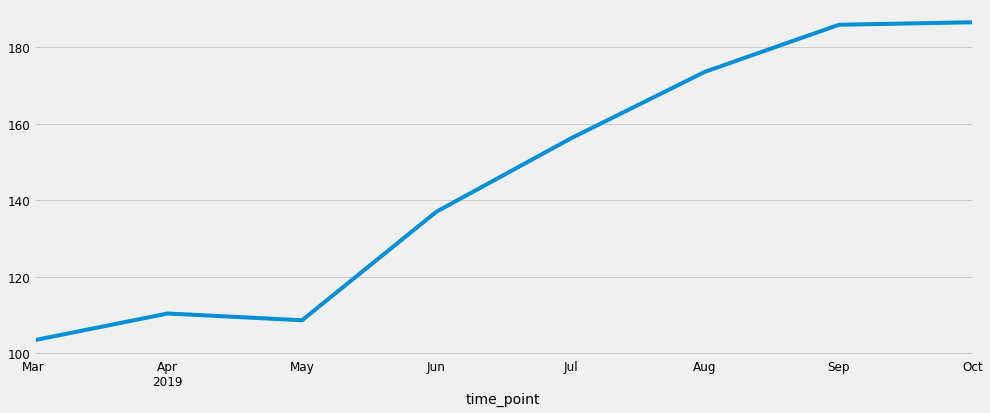

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:82.03846499340047
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:44.930428162360116
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:56.990604439363196
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:52.333295518535
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:51.64844395000607
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:45.657277432484236
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.3601      2.597      0.524      0.600      -3.730       6.450
sigma2       106.3343    337.343      0.315      0.753    -554.846     767.514


In [109]:
#df.to_csv('DFI-final_df_no_duplication_dates.csv', sep='|')
    
for pt in df.product_Type.unique()[5:6]:
    print('===================\n%s\n==================='%pt)
    single_pt_df = df[df['product_Type']==pt].groupby(['TimeSeries_Date']).agg({"TimeSeries_price":['min','max']})
    single_pt_df = single_pt_df.reset_index()
    single_pt_df.columns = ['time_point','min','max']
    single_pt_df['range'] = single_pt_df['max'] - single_pt_df['min']
    
    single_pt_df = single_pt_df.sort_values('time_point')
    single_pt_df.isnull().sum()
  

   
    single_pt_df.set_index('time_point')    
    single_pt_df.index = pandas.to_datetime(single_pt_df['time_point'])  
    y = single_pt_df['min'].resample('MS').mean()
    y.plot(figsize=(15, 6))
    plt.show()
    
    
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
    print('Examples of parameter combinations for Seasonal ARIMA...')
    print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
    print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
    print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
    print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))
    
    
       
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)
                results = mod.fit()
                print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            except:
                continue
                
                
    mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
    results = mod.fit()
    print(results.summary().tables[1])
                